In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

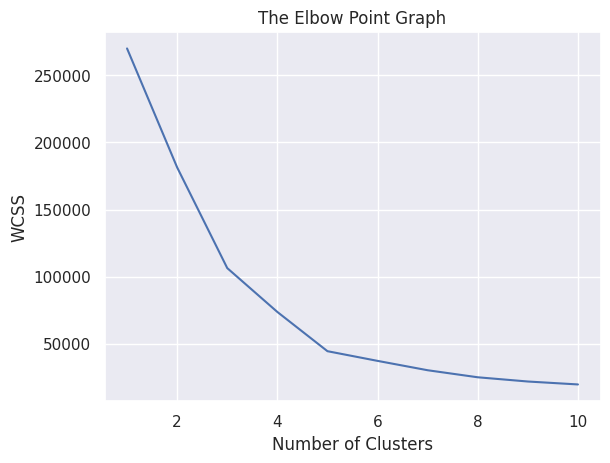

In [9]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters - 0, 1, 2, 3, 4

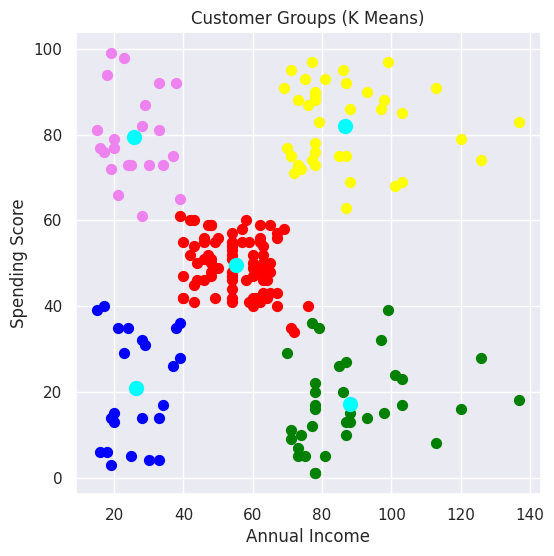

In [23]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups (K Means)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

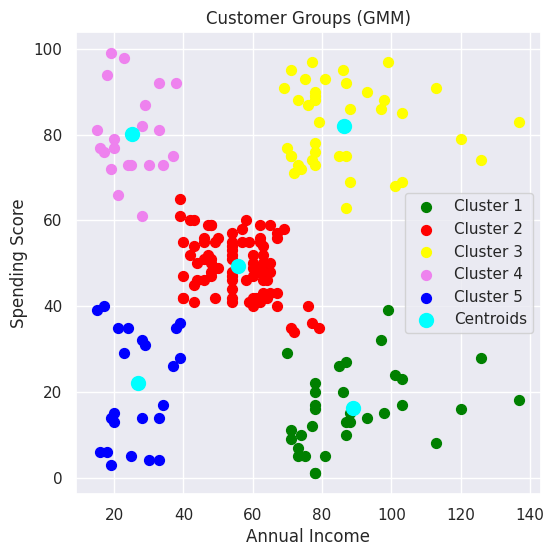

In [13]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=5, random_state=0).fit(X)

# Predict the cluster for each data point
gmm_labels = gmm.predict(X)

# Plot the clusters and their centroids
plt.figure(figsize=(6, 6))
plt.scatter(X[gmm_labels == 0, 0], X[gmm_labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[gmm_labels == 1, 0], X[gmm_labels == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[gmm_labels == 2, 0], X[gmm_labels == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[gmm_labels == 3, 0], X[gmm_labels == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[gmm_labels == 4, 0], X[gmm_labels == 4, 1], s=50, c='blue', label='Cluster 5')

# Plot the centroids
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups (GMM)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [22]:
# Assuming 'Y' from your previous code snippets contains cluster assignments
customer_data['Cluster'] = Y

cluster_means = customer_data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 88.200000               17.114286
1                 55.296296               49.518519
2                 86.538462               82.128205
3                 25.727273               79.363636
4                 26.304348               20.913043


**Conclusions**

1. There are total 5 group of customers.
2. The first group of customer have Average Income k$ 88.200000 and have a Spending score of 17.114286

3. The second group of customer have Average Income k$  86.538462   and have a Spending score of 49.518519

4. The third group of customer have Average Income k$ 86.538462 and have a Spending score of 82.128205

5. The fourth group of customer have Average Income k$ 25.727273 and have a Spending score of 79.363636

6. The fifth group of customer have Average Income k$ 26.304348. and have a Spending score of 20.913043

In [20]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gmm, file)

